In [33]:
import json
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

## Carregando dados armazenados

In [34]:
f = open('../temp/data.json')
data = json.load(f)
f.close()

In [35]:
opcoes_avaliacao = ['Péssimo', 'Ruim', 'Normal', 'Bom', 'Excelente']

## Carregamento dos dados

### Satisfação dos usuários com o assistente

In [36]:
chat_ratings = []

index = 1
size_list_user: int = len(data['user'])

for message in data['watson']:
    if len(message['message']['entities']) > 0 \
        and message['message']['entities'][0]['entity'] == 'solucao':

        if size_list_user >= index and data['user'][index]['message'] in opcoes_avaliacao:
            chat_ratings.append(data['user'][index]['message'])
    index += 1

Intenções

In [37]:
intents = []

for message in data['watson']:
    for intent in message['message']['intents']:
        intents.append(intent)

Entidades

In [38]:
entities = []

for message in data['watson']:
    for entity in message['message']['entities']:
        entities.append(entity)

### Problemas resolvidos

In [67]:
evaluated_problems = []

for message in data['watson']:
    for entity in message['message']['entities']:
        if entity['entity'] == 'solucao':
            evaluated_problems.append(entity)

## Data explorer

### Avaliação do atendimento pelo chatbot

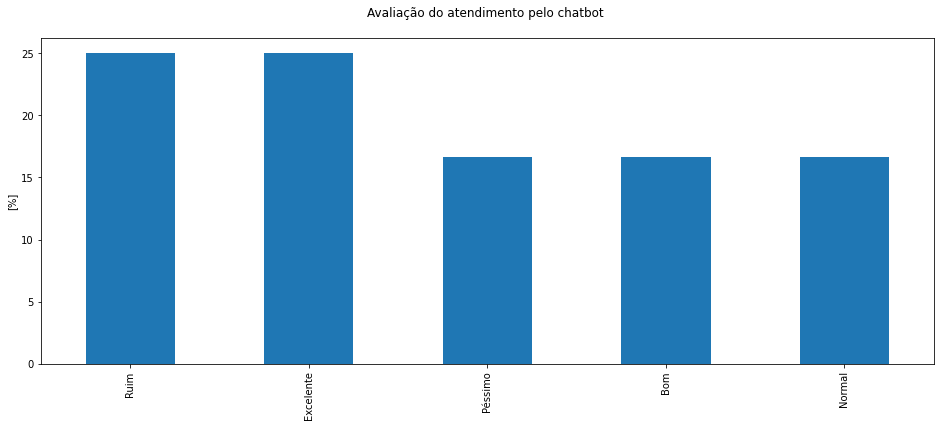

In [48]:
ax = (pd.Series(chat_ratings).value_counts(normalize=True) * 100).plot(kind='bar', figsize=(16, 6))
ax.set_ylabel('[%]')
ax.set_title('Avaliação do atendimento pelo chatbot \n')
plt.show()

### Confiança média das intenções

In [41]:
df_intents = pd.DataFrame(intents, columns=['intent', 'confidence'])

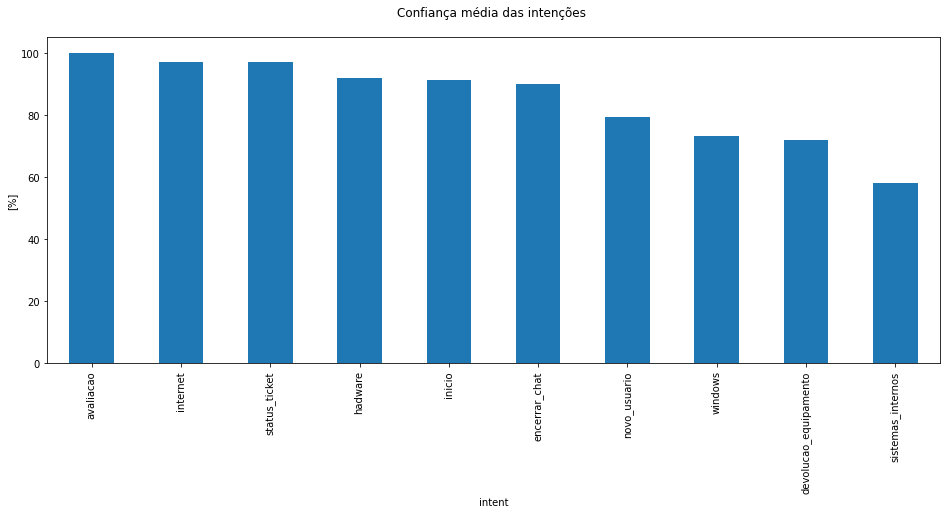

In [51]:
ax = (df_intents.groupby('intent')['confidence'].mean() * 100)\
        .sort_values(ascending=False)\
        .plot(kind='bar', figsize=(16, 6))

ax.set_ylabel('[%]')
ax.set_title('Confiança média das intenções \n')
plt.show()

Entidades mais frequentes

In [72]:
df_entities = pd.DataFrame(entities, columns=['entity', 'location', 'value', 'confidence'])

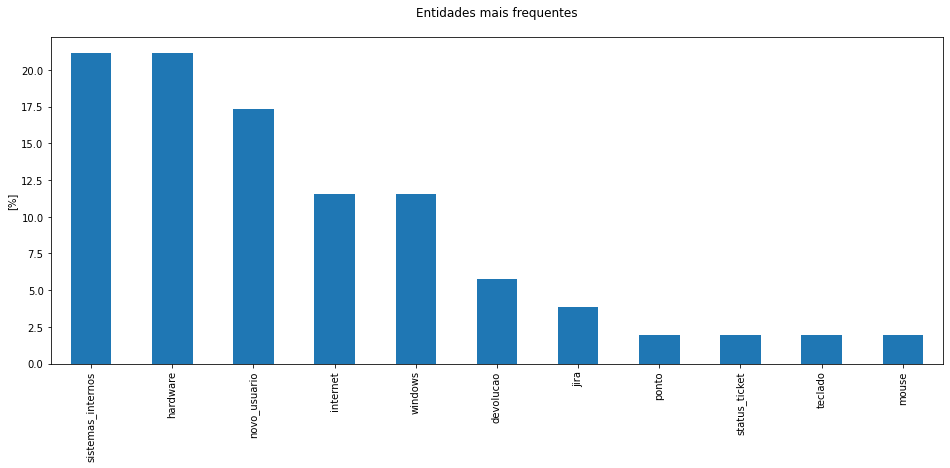

In [73]:
mask = df_entities['entity'] == 'solucao'

ax = (df_entities[~mask]['entity'].value_counts(normalize=True) * 100).plot(kind='bar', figsize=(16, 6))
ax.set_ylabel('[%]')
ax.set_title('Entidades mais frequentes\n')
plt.show()

### Assertividade das orientações dada pelo chatbot

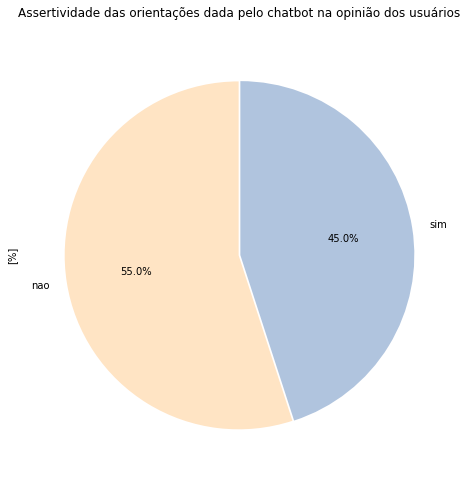

In [104]:
df_problems = pd.DataFrame(evaluated_problems)
ax = df_problems['value'].value_counts(normalize=True)\
    .plot(
        kind='pie', 
        figsize=(8, 8), 
        autopct='%1.1f%%',
        startangle=90, 
        explode=(0, 0.01),
        colors=['bisque', 'lightsteelblue']
    )
ax.set_title('Assertividade das orientações dada pelo chatbot na opinião dos usuários\n')
ax.set_ylabel('[%]')
plt.show()